In [1]:
"""
https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb
https://www.kaggle.com/ashishrane7/logistic-regression-non-linear-decision-boundary/notebook
https://anaconda.org/rafaelhbarros/logistic_regression/notebook
https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-2-2-dceff1a12a12
"""

"""
You will implement regularized logistic regression to predict whether microchips from a fabrication 
plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is 
functioning correctly.
Suppose you are the product manager of the factory and you have the test results for some microchips on two 
different tests. From these two tests, you would like to determine whether the microchips should be accepted 
or rejected. To help you make the decision, you have a dataset of test results on past microchips, 
from which you can build a logistic regression model.
"""

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize as opt
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt

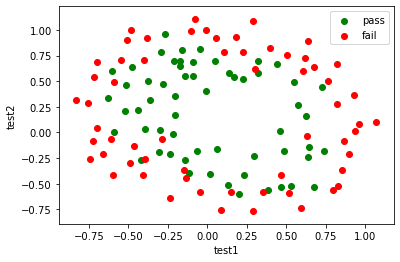

In [3]:
df = pd.read_csv('ex2data2.txt', header=None)
df.columns = ['x1', 'x2', 'y']
mask = df["y"] == 1
x1_pass = df[mask]["x1"]
x2_pass = df[mask]["x2"]
x1_fail = df[~mask]["x1"]
x2_fail = df[~mask]["x2"]
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()


In [4]:
x = df.iloc[:, :-1].values  # return dataframe , all field except last field
y = df.iloc[:, -1].values   # return series , last field
y = y[:, np.newaxis]  # turn shape of y from Series of shape(118,) to Numpy array (118,1)

In [5]:
poly = PolynomialFeatures(6)
x = poly.fit_transform(x)  # convert (118,2) into polynomial of (118,28)


# def mapFeature(x1,x2,degree):
#     """
#     take in numpy array of x1 and x2, return all polynomial terms up to the given degree
#     """
#     out = np.ones(len(x1)).reshape(len(x1),1)
#     for i in range(1,degree+1):
#         for j in range(i+1):
#             terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
#             out= np.hstack((out,terms))
#     return out
# x = mapFeature(x[:,0], x[:,1],6)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # note outer brackets in denominator are important else it bad/wrong result.


def cost_function(theta, x,  y, Lambda):
    m = x.shape[0]
    h = sigmoid(x @ theta)  # h = (118, 28)@(28, 1) = (118, 1)
    # error = (-y * np.log(h)) - ((1-y)*np.log(1-h))
    # j = 1/m * sum(error)
    j = (1/m) * (np.dot(np.log(h).T, -y) - np.dot(np.log(1 - h).T, (1 - y)))

    # Regularization Term
    # reg_term = (Lambda/2*m)*(np.dot(theta.T, theta))
    reg_term = Lambda/(2*m) * sum(theta**2)
    j = j + reg_term
    return j


def first_deri_j(theta, x,  y, Lambda):
    m = x.shape[0]
    h = sigmoid(x @ theta)  # h = (118, 28)@(28, 1) = (118, 1)
    derivative = 1/m * np.dot(x.T, (h-y))  # (h - y)x = (118, 1)-(118, 1) = (118, 28).T @ (118, 1) = (28, 1)
    derivative[1:] = derivative[1:] + (Lambda/m) * theta[1:]  # (28, 1)
    # j_0 = 1/m * (x.T @ (h - y))[0]
    # j_1 = 1/m * (x.T @ (h - y))[1:] + (Lambda/m) * theta[1:]
    # derivative = np.vstack((j_0[:, np.newaxis], j_1))
    return derivative    # this can be also written as j[0,0]


def gradient_descent(theta, x,  y, Lambda, alpha, iterations):
    m = len(y)
    cost_list = list()
    for i in range(iterations):
        cost = cost_function(theta, x,  y, Lambda)
        derivation = first_deri_j(theta, x,  y, Lambda)
        theta = theta - (alpha*derivation)
        cost_list.append(cost)
    return theta, cost_list

In [7]:
m, n = x.shape  # m, n means row, columns of matrix , so m means rows and n means columns.
theta_initial = np.zeros(n).reshape(n, 1)  # alternate theta_initial = np.zeros((n,1))
Lambda = 1
initial_cost = cost_function(theta_initial, x,  y, Lambda)
print("initial_cost=", initial_cost)

initial_cost= [[0.69314718]]


In [8]:
iterations = 500
alpha = 0.3
final_theta, cost_list = gradient_descent(theta_initial, x,  y, Lambda, alpha, iterations)

In [9]:
final_cost = cost_function(final_theta, x,  y, Lambda)
print("final_cost=", final_cost)

final_cost= [[0.53589598]]


In [10]:
# Accuracy of model
p = np.dot(x, final_theta) > 0
accuracy = (np.mean(p == y)) * 100
print("accuracy = {:.2f}%".format(accuracy))

accuracy = 83.05%


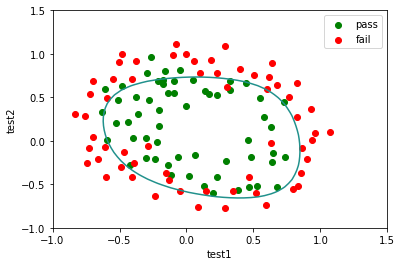

In [11]:
# Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
poly = PolynomialFeatures(6)
for i in range(len(u)):
    for j in range(len(v)):
        my_array = np.array([[u[i]], [v[j]]]).reshape(1, 2)
        z[i, j] = np.dot(poly.fit_transform(my_array), final_theta)
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.contour(u, v, z, 0)
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()

Text(0.5, 1.0, 'Cost function using Gradient Descent')

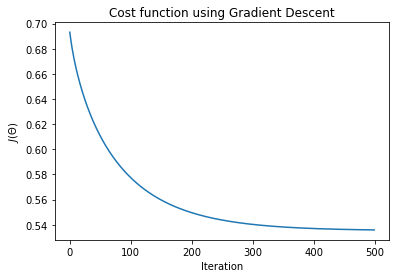

In [12]:
cost_list = [entry.item(0,0) for entry in cost_list]
    
plt.plot(range(iterations), cost_list)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")


In [13]:
theta_initial = np.zeros(n).reshape(n, 1)  # alternate theta_initial = np.zeros((n,1))
output = opt.fmin_tnc(func=cost_function, x0=theta_initial.flatten(),
                      fprime=first_deri_j, args=(x, y.flatten(), Lambda))
auto_theta = output[0]
final_cost = cost_function(final_theta, x,  y, Lambda)
print("final_cost=", final_cost)

final_cost= [[0.53589598]]


In [14]:
# Accuracy of model
p = np.dot(x, auto_theta) > 0
print("p.shape=", p.shape)
p = p.reshape(len(y), 1)
print("p.shape=", p.shape)
accuracy = (np.mean(p == y)) * 100
print("accuracy = {:.2f}%".format(accuracy))

p.shape= (118,)
p.shape= (118, 1)
accuracy = 83.05%


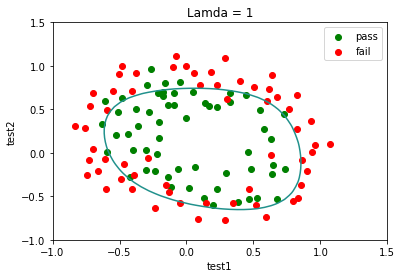

In [15]:
# Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
poly = PolynomialFeatures(6)
for i in range(len(u)):
    for j in range(len(v)):
        my_array = np.array([[u[i]], [v[j]]]).reshape(1, 2)
        z[i, j] = np.dot(poly.fit_transform(my_array), auto_theta)
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.contour(u, v, z, 0)
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.title("Lamda = 1")
plt.show()

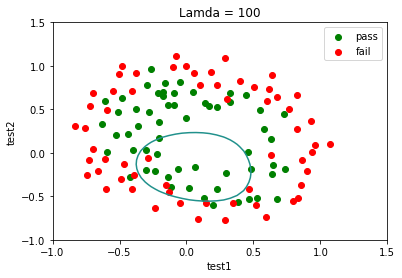

In [16]:
Lambda = 100
theta_initial = np.zeros(n).reshape(n, 1)  # alternate theta_initial = np.zeros((n,1))
output = opt.fmin_tnc(func=cost_function, x0=theta_initial.flatten(),
                      fprime=first_deri_j, args=(x, y.flatten(), Lambda))
auto_theta = output[0]
final_cost, = cost_function(final_theta, x,  y, Lambda)
# Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
poly = PolynomialFeatures(6)
for i in range(len(u)):
    for j in range(len(v)):
        my_array = np.array([[u[i]], [v[j]]]).reshape(1, 2)
        z[i, j] = np.dot(poly.fit_transform(my_array), auto_theta)
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.contour(u, v, z, 0)
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.title("Lamda = 100")
plt.show()

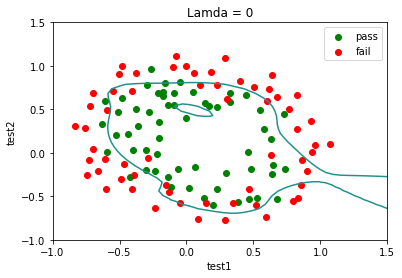

In [17]:
Lambda = 0
theta_initial = np.zeros(n).reshape(n, 1)  # alternate theta_initial = np.zeros((n,1))
output = opt.fmin_tnc(func=cost_function, x0=theta_initial.flatten(),
                      fprime=first_deri_j, args=(x, y.flatten(), Lambda))
auto_theta = output[0]
final_cost, = cost_function(final_theta, x,  y, Lambda)
# Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
poly = PolynomialFeatures(6)
for i in range(len(u)):
    for j in range(len(v)):
        my_array = np.array([[u[i]], [v[j]]]).reshape(1, 2)
        z[i, j] = np.dot(poly.fit_transform(my_array), auto_theta)
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.contour(u, v, z, 0)
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.title("Lamda = 0")
plt.show()